# Deep Learning with TensorFlow and Keras

Keras is a high-level API of the TensorFlow, which provides approachable and highly-productive interface for solving machine learning (ML) problems. It covers the whole ML workflow from data processing to hyperparameter tuning to deployment and enables fast experimentation.

### 1) Set Up TensorFlow and Keras

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

print(tf.__version__)

2.9.0


### 2) Simple (1 layer - 1 neuron) Neural Network

The simplest possible neural network is one with only a single layer with one neuron and has the input shape of a single value as shown in the figure below:

<img src="../image/nn_1_1.png" alt="one layer one neuron neural network" width="600">

Let's assume we are given two sets of data:
```python
x = [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0]
y = [-4.0, -1.0, 2.0, 5.0, 8.0, 11.0]
```
and we want to find the rule behind them which is:
```python
y = 3x + 2
```
#### a) Define the Model and Compile the Neural Network

Keras [Sequential](https://keras.io/api/models/sequential/) class allows to group a linear sequence of layers into a model. The simplest neural network with a single layer can be built with a single [dense](https://keras.io/api/layers/core_layers/dense/) layer, which is the densely-connected neural network layer.


In [18]:
# build a simple sequential model with a dense layer
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

To compile the neural network, a __loss__ function and an __optimizer__ are needed. During the training process, the __loss__ function calculates the loss by comparing the actual values to the predicted values. On the other hand, the __optimizer__ updates the weights of the neural network for a new prediction to minimize the loss. They work in turns for the selected number of __epochs__. Keras API provides a list of available [loss](https://keras.io/api/losses/) functions and [optimizer](https://keras.io/api/optimizers/)s.

In [19]:
# compile the model with sgd optimizer and MSE loss function
model.compile(optimizer='sgd', loss='mean_squared_error')

#### b) Train the Neural Network

To train the model, labeled data is prepared in pairs as input and output values. The values, which are float number in this case, are prepared as numpy arrays.

In [20]:
# inputs and outputs for model training
x = np.array([-2.0, -1.0, 0.0, 1.0, 2.0, 3.0], dtype=float)
y = np.array([-4.0, -1.0, 2.0, 5.0, 8.0, 11.0], dtype=float)

The ```.fit()``` function is called over the model to train the neural network. By going through the training turns, the model learns the relationship between input and output values. The training loops depends on the number of epochs, which is set by the __epoch__ parameter.

In [21]:
# train the model
model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 373ms/step - loss: 41.6561
Epoch 2/300
1/1 [==============================] - 0s 10ms/step - loss: 36.5087
Epoch 3/300
1/1 [==============================] - 0s 11ms/step - loss: 32.0090
Epoch 4/300
1/1 [==============================] - 0s 10ms/step - loss: 28.0752
Epoch 5/300
1/1 [==============================] - 0s 10ms/step - loss: 24.6357
Epoch 6/300
1/1 [==============================] - 0s 11ms/step - loss: 21.6280
Epoch 7/300
1/1 [==============================] - 0s 11ms/step - loss: 18.9975
Epoch 8/300
1/1 [==============================] - 0s 10ms/step - loss: 16.6966
Epoch 9/300
1/1 [==============================] - 0s 11ms/step - loss: 14.6835
Epoch 10/300
1/1 [==============================] - 0s 8ms/step - loss: 12.9220
Epoch 11/300
1/1 [==============================] - 0s 9ms/step - loss: 11.3802
Epoch 12/300
1/1 [==============================] - 0s 8ms/step - loss: 10.0305
Epoch 13/300
1/1 [=====================

When the model is trained with the labeled data, ```.predict()``` method is used to make new predictions for unlabeled data.

In [22]:
# make a prediction
print(model.predict([20.0]))

1/1 [==============================] - 0s 132ms/step
[[62.019344]]


Using the formula below:
```python
y = 3(20) + 2
```
The expected answer would be 62 for the input value 20. Neural networks work with probabilities and the data size as well as other criteria (number of epochs, optimizer, loss function) in this example resulted in model prediction close to true value, but not the exact value. With neural networks, not certainties but probabilities should be considered for prediction and particularly classification tasks.

### 3) Dense Neural Network

A dense neural network (DNN), also known as a fully connected neural network, is a machine learning model in which every neuron in one layer is fully connected to every neuron in the previous layer. DNNs are widely used for classification, regression, and other tasks that require a complex, non-linear mapping between inputs and outputs. They work well with numerical or structural data.

#### a) Load and Prepare the Data

DNNs can be used to perform some computer vision tasks such as classification. The __Fashion MNIST__ dataset, which is available in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API, is a collection of grayscale 28x28 pixel clothing images which is suitable for a basic classification task. The ```.load_data()``` method allows to load the data from the API and returns two tuples with data and labels. The labels are returned as a number list which maps as below:

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| T-shirt/top | Trouser | Pullover | Dress | Coat | Sandal | Shirt | Sneaker | Bag | Ankle boot |

While working with visual data and training a neural network for image processing, it is essential to normalize the pixel values by scaling to (0, 1). Normalizing helps to reduce the effect of feature scales on the performance, avoiding a large scale feautre dominating the model's behavior and generating poor performance. It also allows for more accurate training and lowers the computational costs, while improving stability and the speed of convrgence. 

Label: 5


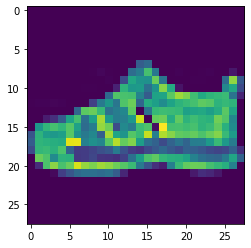

In [43]:
# load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

# load and split the training and test sets of the Fashion MNIST dataset
(train_img, train_lab), (test_img, test_lab) = fmnist.load_data()

# set number of characters per row when printing
#np.set_printoptions(linewidth=320)

# pick a random image from the dataset
i = np.random.randint(train_lab.shape[0], size=1)[0]

# print image and label of the randomly selected sample
print("Label:", train_lab[i])
#print("Image as NumPy array: \n", train_img[i])

# visualize the image
plt.imshow(train_img[i])

# normalize the pixel values from (0, 255) to (0, 1)
train_img  = train_img / 255.0
test_img = test_img / 255.0

#### b) Define the Model and Compile the Neural Network

Keras [Dense](https://keras.io/api/layers/core_layers/dense/) layers are used in a sequential order to create DNNs. The initial step for the visual data in a DNN is to flatten the matrix of normalized pixel values into a 1-dimensional array, which can be done by the [Flatten](https://keras.io/api/layers/reshaping_layers/flatten/) layer. It flattens the input without changing the batch size. The fully connected dense layers can be added by specifying the dimensionality of the output space, and the activation function to use. The __activation__ parameter is used to specify the activation function. If not specified, no activation is applied (ie. "linear" activation: a(x) = x). However, for neural networks to learn and represent complex relationships between inputs and outputs, activation functions are essential as they introduce non-linearity into the model. Some of them are [softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax) (used to normalize a vector of real numbers to a probability distribution for classification tasks), [sigmoid](https://www.tensorflow.org/api_docs/python/tf/math/sigmoid) (similar to softmax as it outputs in the range 0-1), [relu](https://www.tensorflow.org/api_docs/python/tf/nn/relu) (used to map all negative values to 0 and all positive values to the same value, introducing non-linearity to the network and helping to prevent vanishing gradients) etc. More parameters to specify the layer (i.e bias, regularization) can be found in the Keras [Dense](https://keras.io/api/layers/core_layers/dense/) layer page.

In [ ]:
# build the classification model (try first dense layer with 1024 neurons)
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

- __Flatten Layer:__ The first layer in the neural network should be the same shape as the data (to avoid an error about the shape of the data), and it is more feasible to flatten the matrix rather than using the matrix shape here.

- __Dense Layer__ (with softmax and 10 neurons)__:__ As a rule of thumb, the number of neurons in the last layer should match the number of classes the data is being classified into. Otherwise, the model returns an error if it finds an unexpected value. Hence, the last dense layer has ```10``` neurons, mapping the input to a list of 10 probabilities for 10 classes. 

- __Dense Layer__ (with relu and 128 neurons)__:__ The number of neurons in the first dense layer is set intuitionally. It can be changed to any other number if it will provide better results. However, increasing the number of neurons will slow down the training process and may not always improve the accuracy! 

- __Number of layers:__ The number of layers is also set intiutionally. Adding more layers to this model for Fashion MNIST data set would likely result in longer training time with no significant impact, since the data is relatively simple. However, for more complex data usually extra layers are necessary.

The neural network is compiled with ```.compile()``` call by spesifying a __loss__ function and an __optimizer__ as explained before. Later, the model is trained with the data by calling ```.fit()``` function to fit the training data to the training labels. The __metrics__ parameter is used to track preferred metrics during the training.

In [ ]:
# compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# fit the model to data with 20 epochs
model.fit(train_img, train_lab, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5022 - accuracy: 0.8225
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3781 - accuracy: 0.8638
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3383 - accuracy: 0.8773
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3126 - accuracy: 0.8858
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2942 - accuracy: 0.8910
Epoch 6/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2770 - accuracy: 0.8970
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2653 - accuracy: 0.9016
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2567 - accuracy: 0.9035
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2437 - accuracy: 0.9090
Epoch 10/20
1875/1875 [==============================] - 11s 6ms/step - l

- __Number of epochs:__ 
TODO
Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases.
This is a side effect of something called 'overfitting' which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)


The final accuracy of the model can be found on the last epoch. The accuracy on the last epoch above is __0.93__, which means the model is %93 accurate on the training set. However, it is also crucial to confirm how the model performs on the test set, which can be checked by the ```.evaluate()``` call. The accuracy of the model on the unseen data is __0.88__, which means it is 88% accurate on the unseen data. As expected, the model performs less accurate on the test set.

In [46]:
# evaluate the model on the unseen test data
model.evaluate(test_img, test_lab)

313/313 [==============================] - 5s 6ms/step - loss: 0.3649 - accuracy: 0.8870


[0.36485448479652405, 0.8870000243186951]

With the softmax activation on the last layer, the model predicts the probabilities of the input image being in any of the 10 classes defined before. Hence for each prediction, the model returns a 10 item list with 10 probabilities. The highest probability is used as the prediction of the model for the input image. An example of a test data is shown below:

313/313 [==============================] - 1s 3ms/step
Probabilities of each class for the item (39):
 [1.9281529e-13 4.3010161e-19 4.9714338e-16 1.1918483e-15 4.4886968e-23 1.2032177e-07 1.1423350e-15 2.7894768e-05 8.2871857e-15 9.9997199e-01]
Predicted class of the item (39): 9
Actual class of the item (39): 9


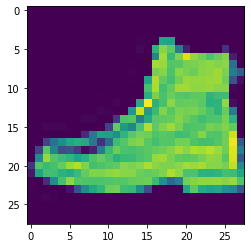

In [80]:
# predict all items in the test set
classes = model.predict(test_img)

# pick an item
i = 39

# print item classification probabilities
print(f"Probabilities of each class for the item ({i}):\n", classes[i])
print(f"Predicted class of the item ({i}):", np.argmax(classes[i]))
print(f"Actual class of the item ({i}):", test_lab[i])

# visualize the image
plt.imshow(test_img[i])

#### c) Create a Callback to Control Training

Rather than setting the number of epochs intuitionally and checking the loss, [Callbacks API](https://keras.io/api/callbacks/) allows to stop training when a specific metric is met. By setting callbacks while fitting the model with __callbacks__ parameter, the training stops when the desired metric is met and the remaining epochs are avoided. 

In [87]:
class myCallback(tf.keras.callbacks.Callback):
    # check certain condition when the current epoch ends
    def on_epoch_end(self, epoch, logs={}):
        
        # if loss gets smaller then 0.3 and accuracy gets higher than 0.9, stop training
        if((logs.get('loss') < 0.3) and (logs.get('accuracy') > 0.9)):
            print("\nLoss < 0.3 and accuracy > 0.9, training is terminated.")
            self.model.stop_training = True

# instantiate class
callbacks = myCallback()

Using the callback, we may use the same model to see how it stops before completing the total number of epochs. In this example, both the accuracy and the loss are checked before terminating the training.

In [88]:
# build the classification model (same as before)
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# compile the model
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [89]:
# train the model with a callback
model.fit(train_img, train_lab, epochs=20, callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4982 - accuracy: 0.8238
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3785 - accuracy: 0.8638
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3400 - accuracy: 0.8763
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3150 - accuracy: 0.8862
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2983 - accuracy: 0.8905
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2844 - accuracy: 0.8946
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2701 - accuracy: 0.8989
Epoch 8/20
1869/1875 [============================>.] - ETA: 0s - loss: 0.2584 - accuracy: 0.9037
Loss < 0.3 and accuracy > 0.9, training is terminated.
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2585 - accuracy: 0.9037


Even though the number of epochs were set to 20, training stops after the 8th epoch since the accuracy and the loss values met the specified condition.

### 4) Convolutional Neural Network

A convolutional neural network (CNN) is a type of deep learning neural network architecture commonly used for image and signal processing tasks. It has multiple layers, including convolutional, pooling, and fully connected layers, which allows to extract features and make predictions from input data. CNNs have been widely used in computer vision applications, such as object detection, image classification, and image segmentation.

#### a) Load and Prepare the Data

The same __Fashion MNIST__ dataset can be classified using the CNNs where the labels were defined as below:

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| T-shirt/top | Trouser | Pullover | Dress | Coat | Sandal | Shirt | Sneaker | Bag | Ankle boot |

Since the data loading procedure is the same, previously downloaded data will be used directly. 

#### b) Define the Model and Compile the Neural Network

Keras [Convolution](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [Max Pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers are used in a sequential order followed by [Flatten](https://keras.io/api/layers/reshaping_layers/flatten/) layer to flatten the result of convolutions into a 1-dimensional array and [Dense](https://keras.io/api/layers/core_layers/dense/) layer to perform classification with activation functions in order to create CNNs. Adding convolution layers before allows to bring more focused and accurate information to the dense layers. The ```.summary()``` is called to see tghe model structure with size reductions.

In [90]:
# build the classification model
model = tf.keras.models.Sequential([
                                           
  # add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # add dense layers (same as in shallow example before)
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# print the model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 800)               0         
                                                                 
 dense_17 (Dense)            (None, 128)             

- __Convolution Layer:__ The first layer in the neural network is a Convolution layer where the shape of the input data (28, 28, 1) is defined by the parameter __input_shape__. The first parameter __filters__ is the dimension of the output space (the number of filters in the convolution), which is the number of convolutions to be generated. In this particular convolution layer, it is set to ```32``` to apply 32 convolutions. *Usually using the powers of 2 starting from 32 is a good practice.* The second parameter __kernel_size__ specifies the size of the convolution window, and is set to ```(3,3)``` grid in this example. The __activation__ parameter is used to define the activation function which will be used, and is set to ReLU here. The output of the first convolution layer has the shape (26, 26, 32) since the boundaries are not calculated during the convolutions and the size is reduced by 2 in both dimensions. There is no need to set the __input_shape__ in the second convolution layer, and the output shape is again reduced similarly by x and y dimensions while the depth is the same.

- __Max Pooling Layer:__  The Max Pooling layer is designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. It gets the __pool_size__ parameter which is the downscale factor (dim1, dim2). If only one integer is specified, the same window length will be used for all dimensions. It is set to ```(2,2)``` in this example, which quarters the size of the image. It turns 4 pixels into 1 by picking the biggest one, and repeats this across the image to halve both the number of horizontal and vertical pixels.

- __Flatten Layer:__ It flattens the data from the previous layer into a 1-dimensional array.

- __Dense Layer:__ Similar to the shallow neural network above, dense layers are used here to reduce the data size and perform the classification.

- __Number of layers:__ 

The neural network is compiled with ```.compile()``` call by spesifying a __loss__ function and an __optimizer__ as explained before. Later, the model is trained with the data by calling ```.fit()``` function to fit the training data to the training labels. It is also tested on the unseen test data by calling ```.evaluate()``` function.

In [91]:
# compile the model
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
model.fit(train_img, train_lab, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 71s 13ms/step - loss: 0.4720 - accuracy: 0.8283
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3204 - accuracy: 0.8829
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2775 - accuracy: 0.8968
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2455 - accuracy: 0.9080
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2218 - accuracy: 0.9168


In [92]:
# evaluate the model on the unseen test data
model.evaluate(test_img, test_lab)

313/313 [==============================] - 5s 12ms/step - loss: 0.2645 - accuracy: 0.9063


[0.26450875401496887, 0.9063000082969666]

Compared to the DNN results before, CNN performs with a much higher accuracy for both training and test sets for much less epochs. However, running the training for more epochs (i.e. 20), may reduce the validation results despite the training results getting better. It is called __*overfitting*__ and it occurs when the network learns the data from the training set really well, but it is less effective at interpreting the unseen data.

Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the dense layer is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

1/1 [==============================] - 0s 21ms/step


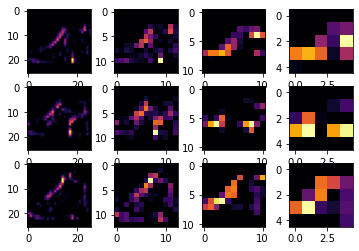

In [ ]:
f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0 # has label 9 shoes
SECOND_IMAGE=23 # has label 9 shoes
THIRD_IMAGE=28 # has label 9 shoes
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_img[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_img[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_img[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

### 5) Data Input

#### a) (Deprecated) Keras Preprocessing
A tricky part of building a model is deciding the right feature representation, which usually requires experimentation on a specific data set. Keras [Preprocessing](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing) API allows to prepare the data input to the model. Even though it is deprecated, some features are still widely used including but not limited to [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator). Below example shows how to use it for data preprocessing.

tf.keras.preprocessing.image.ImageDataGenerator is not recommended for new code. Prefer loading images with tf.keras.utils.image_dataset_from_directory and transforming the output tf.data.Dataset with preprocessing layers. For more information, see the tutorials for loading images and augmenting images, as well as the preprocessing layer guide.

#### b) Data Input Pipelines with tf.data

https://www.tensorflow.org/guide/data#:~:text=The%20tf.,into%20a%20batch%20for%20training.
https://www.scaler.com/topics/keras/image-data-pipelines-in-keras/